# Time series correlation
## Import libraries

In [22]:
import pandas as pd
import plotly.express as px
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.io as pio
#pio.renderers.default = 'notebook'

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read and process data

In [33]:
nuevos_coronavirus = pd.read_excel('/content/drive/My Drive/Colab Notebooks/data/series_temporales_salud.xlsx', sheet_name='nc_coronavirus_chino', header=[0], index_col=[0])
nuevos_coronavirus

,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30
Factiva_Nuevos Coronavirus,0,0,0,0,0,0,0,0,0,2,...,362,414,458,448,522,503,350,367,502,461
GT_Coronavirus chino,0,15,0,0,0,0,0,0,0,0,...,9,4,7,4,0,0,11,0,0,3
GT_Coronavirus en chino,0,0,0,23,0,0,0,0,0,0,...,29,0,17,14,0,21,41,0,0,13
GT_Sintomas coronavirus,0,0,0,1,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
GT_Sintomas coronavirus chino,0,0,8,0,0,0,0,0,0,0,...,0,0,9,0,0,0,0,0,0,0


In [34]:
nuevos_coronavirus = nuevos_coronavirus.transpose().reset_index()
nuevos_coronavirus.columns = ['fecha','factiva nuevos coronavirus','coronavirus_chino','coronavirus_en_chino','sintomas_coronavirus','sintomas_coronavirus_chino']
nuevos_coronavirus['tema'] = 'nuevos coronavirus'
nuevos_coronavirus

,fecha,factiva nuevos coronavirus,coronavirus_chino,coronavirus_en_chino,sintomas_coronavirus,sintomas_coronavirus_chino,tema
0,2020-01-01,0,0,0,0,0,nuevos coronavirus
1,2020-01-02,0,15,0,0,0,nuevos coronavirus
2,2020-01-03,0,0,0,0,8,nuevos coronavirus
3,2020-01-04,0,0,23,1,0,nuevos coronavirus
4,2020-01-05,0,0,0,0,0,nuevos coronavirus
...,...,...,...,...,...,...,...
177,2020-06-26,503,0,21,2,0,nuevos coronavirus
178,2020-06-27,350,11,41,2,0,nuevos coronavirus
179,2020-06-28,367,0,0,2,0,nuevos coronavirus
180,2020-06-29,502,0,0,2,0,nuevos coronavirus


In [35]:
data_new_melted = nuevos_coronavirus.melt(id_vars=['fecha','tema'], var_name='keyword', value_vars=['factiva nuevos coronavirus','coronavirus_chino','coronavirus_en_chino','sintomas_coronavirus','sintomas_coronavirus_chino'])
data_new_melted

,fecha,tema,keyword,value
0,2020-01-01,nuevos coronavirus,factiva nuevos coronavirus,0
1,2020-01-02,nuevos coronavirus,factiva nuevos coronavirus,0
2,2020-01-03,nuevos coronavirus,factiva nuevos coronavirus,0
3,2020-01-04,nuevos coronavirus,factiva nuevos coronavirus,0
4,2020-01-05,nuevos coronavirus,factiva nuevos coronavirus,0
...,...,...,...,...
905,2020-06-26,nuevos coronavirus,sintomas_coronavirus_chino,0
906,2020-06-27,nuevos coronavirus,sintomas_coronavirus_chino,0
907,2020-06-28,nuevos coronavirus,sintomas_coronavirus_chino,0
908,2020-06-29,nuevos coronavirus,sintomas_coronavirus_chino,0


In [36]:
# Set the tema and keyword
tema = 'nuevos coronavirus'
keyword = 'coronavirus_chino'

In [37]:
data_new_melted[(data_new_melted.tema==tema)]

,fecha,tema,keyword,value
0,2020-01-01,nuevos coronavirus,factiva nuevos coronavirus,0
1,2020-01-02,nuevos coronavirus,factiva nuevos coronavirus,0
2,2020-01-03,nuevos coronavirus,factiva nuevos coronavirus,0
3,2020-01-04,nuevos coronavirus,factiva nuevos coronavirus,0
4,2020-01-05,nuevos coronavirus,factiva nuevos coronavirus,0
...,...,...,...,...
905,2020-06-26,nuevos coronavirus,sintomas_coronavirus_chino,0
906,2020-06-27,nuevos coronavirus,sintomas_coronavirus_chino,0
907,2020-06-28,nuevos coronavirus,sintomas_coronavirus_chino,0
908,2020-06-29,nuevos coronavirus,sintomas_coronavirus_chino,0


In [38]:
# Graph the number of hits per source
# TODO: fix the warning that appear with new version of pandas
#       add 2nd axis for factiva values
g = px.line(
    data_new_melted[(data_new_melted.tema==tema)],
    x='fecha',
    y='value',
    color='keyword')

g.show(renderer='colab')

In [39]:
nuevos_coronavirus.columns

Index(['fecha', 'factiva nuevos coronavirus', 'coronavirus_chino',
       'coronavirus_en_chino', 'sintomas_coronavirus',
       'sintomas_coronavirus_chino', 'tema'],
      dtype='object')

In [40]:
# Get pearson and spearment correlation for all data together using pandas built-in function
p_pearson = nuevos_coronavirus[nuevos_coronavirus.tema==tema][['factiva nuevos coronavirus','coronavirus_chino']].corr(method='pearson')
print(p_pearson)
p_spearman = nuevos_coronavirus[nuevos_coronavirus.tema==tema][['factiva nuevos coronavirus','coronavirus_chino']].corr(method='spearman')
print(p_spearman)

                            factiva nuevos coronavirus  coronavirus_chino
factiva nuevos coronavirus                    1.000000          -0.080395
coronavirus_chino                            -0.080395           1.000000
                            factiva nuevos coronavirus  coronavirus_chino
factiva nuevos coronavirus                    1.000000           0.108369
coronavirus_chino                             0.108369           1.000000


In [41]:
# Get pearson correlation using scipy, confirming pandas is doing the right thing
r, p = stats.pearsonr(nuevos_coronavirus[nuevos_coronavirus.tema==tema]['factiva nuevos coronavirus'],nuevos_coronavirus[nuevos_coronavirus.tema==tema]['coronavirus_chino'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Scipy computed Pearson r: -0.08039494981001494 and p-value: 0.2806493463144065


In [51]:
# Calculate the rolling median with a specified window length preferably according to seasonality, weekly intervals?
rolling_median = nuevos_coronavirus[nuevos_coronavirus.tema==tema][['factiva nuevos coronavirus','coronavirus_chino']].rolling(window=7, center=True).median()
rolling_median

,factiva nuevos coronavirus,coronavirus_chino
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,0.0,0.0
4,0.0,0.0
...,...,...
177,458.0,0.0
178,461.0,0.0
179,NaN,NaN
180,NaN,NaN


In [52]:
dates = nuevos_coronavirus[nuevos_coronavirus.tema==tema].loc[range(0,182,1),'fecha']
dates

0     2020-01-01
1     2020-01-02
2     2020-01-03
3     2020-01-04
4     2020-01-05
         ...    
177   2020-06-26
178   2020-06-27
179   2020-06-28
180   2020-06-29
181   2020-06-30
Name: fecha, Length: 182, dtype: datetime64[ns]

In [84]:
# Graph rolling median
g = px.line(
    rolling_median,
    x=dates,
    y=['factiva nuevos coronavirus','coronavirus_chino'])
g.show(renderer='colab')

In [58]:
# Calculate the correction by window segments using the median or real values
#TODO:
# Add real index
# compute for all topics in a loop
# function to calculate it all
# investigate how seasonality affects it
# draw topics on separate axis?
# add granger test with lagged

# Set the size for the window segments
rolling_window_size = 7

# Interpolate data so the time series has continuity, by default using linear interpolation (might not be such a good idea)
data_interpol = nuevos_coronavirus[nuevos_coronavirus.tema==tema][['factiva nuevos coronavirus','coronavirus_chino']].interpolate()
data_interpo = nuevos_coronavirus[nuevos_coronavirus.tema==tema][['factiva nuevos coronavirus','coronavirus_chino']]
data_interpol_median = rolling_median[['factiva nuevos coronavirus','coronavirus_chino']].interpolate()
data_interpol_median = rolling_median[['factiva nuevos coronavirus','coronavirus_chino']]

# Measure the correlation between the rolling window on one side and the other source, explore the two directions
data_rollingF = data_interpol['factiva nuevos coronavirus'].rolling(window=rolling_window_size, center=True).corr(data_interpol['coronavirus_chino'])
data_rolling_medianF = data_interpol_median['factiva nuevos coronavirus'].rolling(window=rolling_window_size, center=True).corr(data_interpol_median['coronavirus_chino'])

data_rollingG = data_interpol['coronavirus_chino'].rolling(window=rolling_window_size, center=True).corr(data_interpol['factiva nuevos coronavirus'])
data_rolling_medianG = data_interpol_median['coronavirus_chino'].rolling(window=rolling_window_size, center=True).corr(data_interpol_median['factiva nuevos coronavirus'])

data_rollingF

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
177   -0.585206
178   -0.651357
179         NaN
180         NaN
181         NaN
Length: 182, dtype: float64

In [59]:
# Graph correlation between rolling window Factiva and Google Trends
g = px.line(data_rollingF, x=dates, y=data_rollingF)
g.show(renderer='colab')

In [62]:
# Check the correlation between median rolling window Factiva and Google Trends
g = px.line(data_rolling_medianF, x=dates, y=data_rolling_medianF)
g.show(renderer='colab')

In [63]:
# Create two new dataframes with each topic for analysing cross correlation
d1 = nuevos_coronavirus[nuevos_coronavirus.tema==tema]['factiva nuevos coronavirus'].fillna(0)
d2 = nuevos_coronavirus[nuevos_coronavirus.tema==tema]['coronavirus_chino'].fillna(0)

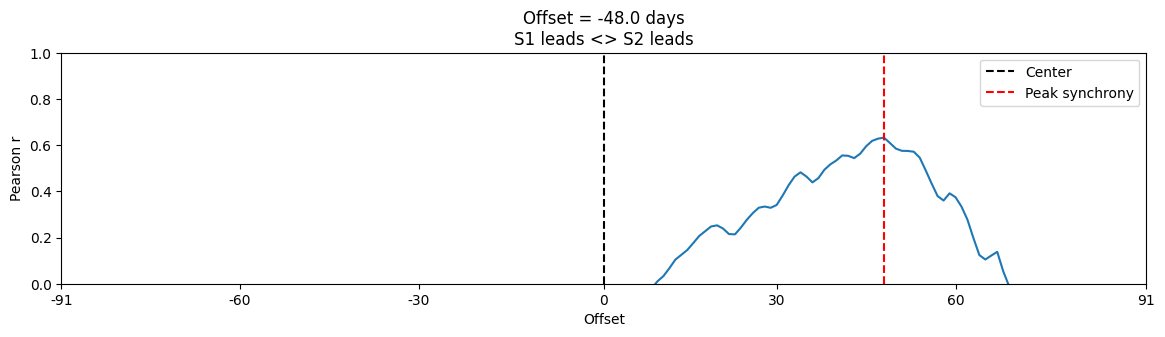

In [64]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation.
    Shifted data filled with NaNs
    ccccccccccccccccccccccccccccccccccccccccccccc
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else:
        return datax.corr(datay.shift(lag))

lag_window = 90

rs = [crosscorr(d1,d2, lag) for lag in range(-int(lag_window),int(lag_window+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} days\nS1 leads <> S2 leads',ylim=[0,1],xlim=[0,lag_window*2], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 30, 60, 91, 120, 150, 182])
ax.set_xticklabels([-91, -60, -30, 0, 30, 60, 91]);
plt.legend();

In [75]:
# Recreate per topic dataframes for window time lagged cross correlation
d1 = data_interpol_median['factiva nuevos coronavirus'].fillna(0)
d2 = data_interpol_median['coronavirus_chino'].fillna(0)

In [76]:
# Windowed time lagged cross correlation
lag_window = 5
no_splits = 24
samples_per_split = 7
rss=[]
for t in range(0, no_splits):
    d1w = d1.loc[(t)*samples_per_split:(t+1)*samples_per_split]
    d2w = d2.loc[(t)*samples_per_split:(t+1)*samples_per_split]
    rs = [crosscorr(d1w,d2w, lag) for lag in range(-int(lag_window),int(lag_window+1))]
    rss.append(rs)
rss_wtl = pd.DataFrame(rss).fillna(0)

rss_wtl

,0,1,2,3,4,5,6,7,8,9,10
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.680414,0.855663,0.966928,0.878310,0.000000,0.000000,0.000000
3,0.896258,0.957558,0.903259,0.811133,0.860950,0.833058,0.815750,0.663247,0.638711,0.852594,0.956740
4,0.000000,-0.333333,-0.666667,-0.707107,0.078567,0.549260,0.655197,0.763037,0.422885,0.602464,0.609994
5,-0.500000,-1.000000,-0.763551,-0.871672,-0.399432,0.061222,0.345915,0.982872,0.781179,0.577350,0.000000
6,0.500000,0.981158,0.856539,0.833105,0.808694,0.834369,0.737635,0.908203,0.892607,0.943456,0.802955
7,0.000000,0.555556,0.753815,0.497718,0.569000,0.771914,0.921360,0.985642,0.872021,0.556269,0.000000
8,0.000000,-0.502519,-0.668657,-0.789352,-0.942656,-0.908853,-0.662298,-0.407718,0.000000,0.000000,0.000000
9,0.000000,0.517772,0.906467,0.767512,0.841240,0.940901,0.973712,0.830574,0.000000,0.000000,0.000000


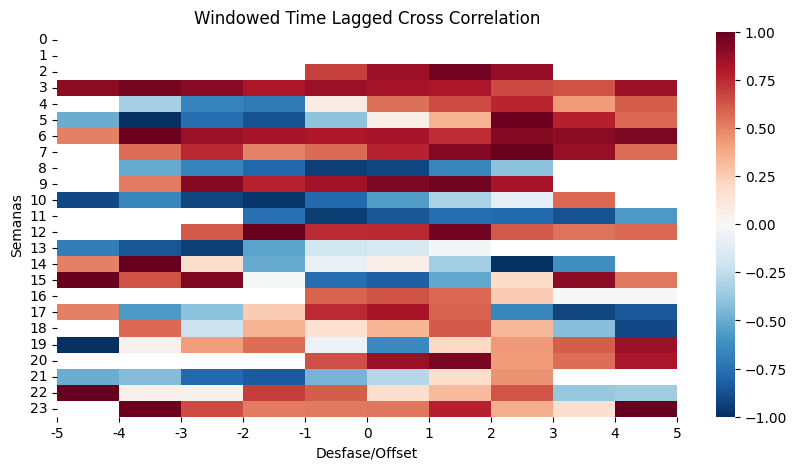

In [77]:
# Graph the window lagged cross correlation
# TODO: Add the value of correlation to the heatmap
# El heat map muestra que en las semanas 15 y 19, cuando
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Windowed Time Lagged Cross Correlation',xlim=[0,lag_window+1], xlabel='Desfase/Offset',ylabel='Semanas');
ax.set_xticks(range(0,int(lag_window*2+1)));
ax.set_xticklabels(range(-int(lag_window),int(lag_window+1)));

In [78]:
# Recreate per topic dataframes for window time lagged cross correlation
d1 = nuevos_coronavirus[nuevos_coronavirus.tema==tema]['factiva nuevos coronavirus'].fillna(0)
d2 = nuevos_coronavirus[nuevos_coronavirus.tema==tema]['coronavirus_chino'].fillna(0)

d1 = data_interpol_median['factiva nuevos coronavirus'].fillna(0)
d2 = data_interpol_median['coronavirus_chino'].fillna(0)

In [81]:
# Rolling window time lagged cross correlation
lag_window = 5
window_size = 14 #samples
t_start = 0
t_end = t_start + window_size
step_size = 1
rss=[]
while t_end < 180:
    d1wt = nuevos_coronavirus[nuevos_coronavirus.tema==tema]['factiva nuevos coronavirus'].iloc[t_start:t_end]
    d2wt = nuevos_coronavirus[nuevos_coronavirus.tema==tema]['coronavirus_chino'].iloc[t_start:t_end]
    rs = [crosscorr(d1wt,d2wt, lag, wrap=False) for lag in range(-int(lag_window),int(lag_window+1))]
    rss.append(rs)
    t_start = t_start + step_size
    t_end = t_end + step_size
rss_rwtl = pd.DataFrame(rss)

rss_rwtl

,0,1,2,3,4,5,6,7,8,9,10
0,NaN,NaN,NaN,NaN,-0.083333,-0.076923,-0.083333,-0.090909,-0.100000,-0.111111,-0.125000
1,1.000000,-0.111111,-0.100000,-0.090909,-0.083333,-0.091885,-0.083333,-0.090909,-0.100000,-0.111111,-0.125000
2,1.000000,-0.111111,-0.100000,-0.090909,-0.083333,-0.076923,-0.083333,NaN,NaN,NaN,NaN
3,0.205499,-0.145479,-0.130466,-0.118262,-0.108148,-0.099627,-0.083333,-0.090909,NaN,NaN,NaN
4,0.205499,-0.145479,-0.130466,-0.118262,-0.108148,-0.099627,-0.108148,-0.090909,-0.100000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
161,-0.528401,0.501425,-0.088376,0.429593,0.128615,-0.280085,-0.049987,-0.229499,-0.061444,0.596841,-0.050606
162,-0.421595,0.343867,-0.065233,0.491589,-0.107002,-0.157402,0.063691,-0.225444,-0.074915,0.320662,0.225545
163,-0.215971,0.506715,-0.276517,0.300109,-0.208962,-0.368419,0.012695,0.027901,0.186264,0.439339,-0.033135
164,-0.189363,0.463369,-0.351749,0.174662,-0.324952,-0.437138,-0.108924,0.029360,0.246295,0.389340,0.133738


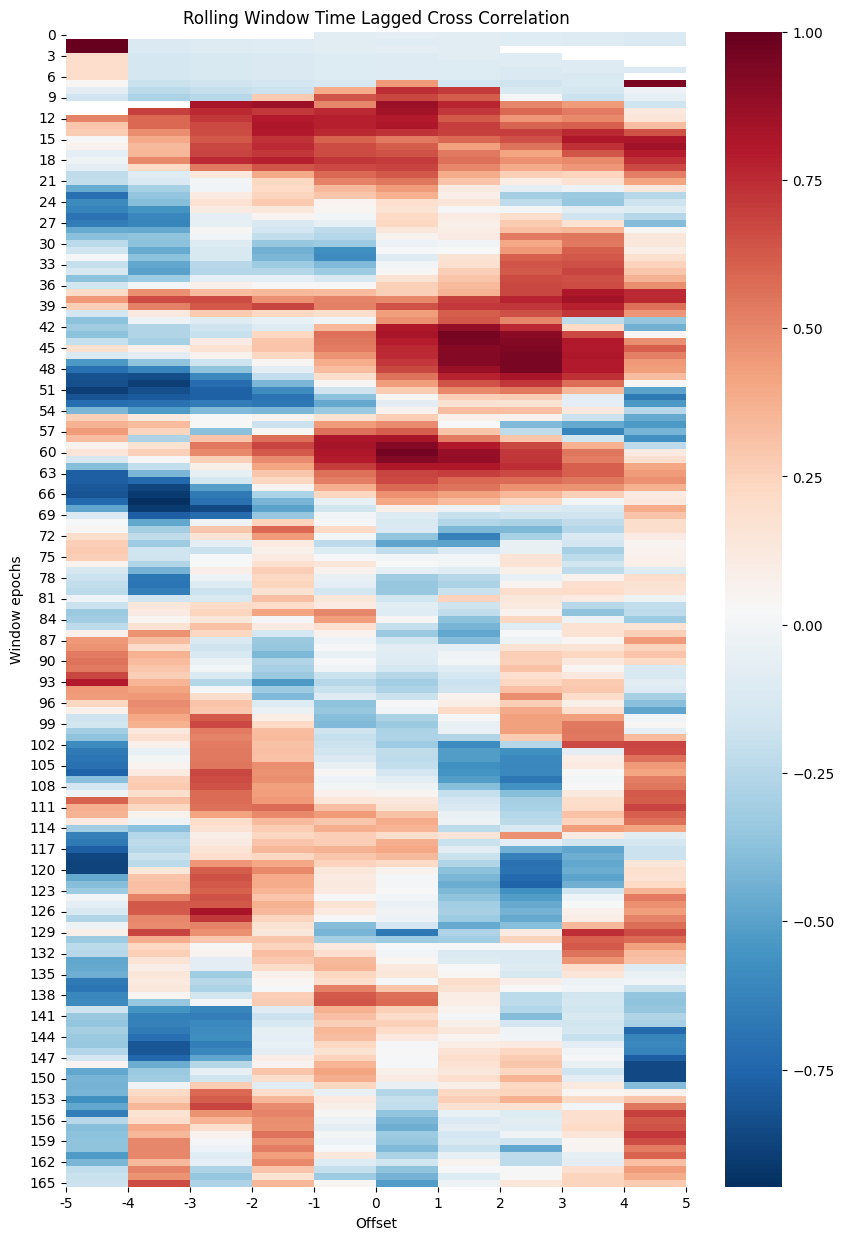

In [82]:
# Graph the window lagged cross correlation
f,ax = plt.subplots(figsize=(10,15))
sns.heatmap(rss_rwtl,cmap='RdBu_r',ax=ax)
ax.set(title=f'Rolling Window Time Lagged Cross Correlation',xlim=[0,lag_window+1], xlabel='Offset',ylabel='Window epochs');
ax.set_xticks(range(0,int(lag_window*2+1)));
ax.set_xticklabels(range(-int(lag_window),int(lag_window+1)));